In [2]:
import scanpy as sc
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import scanpy.external as sce
import seaborn as sns
from matplotlib_venn import venn2, venn2_circles, venn2_unweighted,venn3_unweighted
from matplotlib_venn import venn3, venn3_circles
#%matplotlib inline
import ecopy as ep

from scipy.stats import ranksums
from anndata import AnnData
def sort_cnt(arr):
    npcnt=np.array(np.unique(arr,return_counts=True)).T
    dfcnt=pd.DataFrame(npcnt)
    dfcnt[1]=dfcnt[1].astype('int')
    dfcnt=dfcnt.sort_values(by=1,ascending=False)
    return dfcnt
import time
from scipy.stats import zscore
import celltypist

# predict from external celltypist models

In [7]:
adata = sc.read('/n/data2/dfci/medonc/cwu/meb521/singlecell/AML_DLI/AML_DLI_TRB_all_final.h5ad')

In [8]:
adata = adata[ (adata.obs['time']!='DLI') & ~(adata.obs['T-subtype'].str.contains('Naive_Helper|TCM')) ].copy()

In [9]:
adata[(adata.obs['time']!='DLI')].obs['T-subtype'].value_counts()

adata[ (adata.obs['time']!='DLI') & ~(adata.obs['T-subtype'].str.contains('Naive_Helper|TCM')) ].obs['T-subtype'].value_counts()

TEMRA        7201
NK_1         5737
TEM/TRM_3    1188
TEM/TRM_1     951
NK_2          633
TEM/TRM_2     564
NK-like       316
MAIT          215
NK_3          147
Name: T-subtype, dtype: int64

In [11]:
sc.pp.filter_genes(adata, min_cells=10)

In [12]:
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)

## AML_Livius

In [13]:
model = '/n/data2/dfci/medonc/cwu/meb521/singlecell/TcellAtlas/AML_Livius_T_NK_with_stat_500_500gene_10it_100it.pkl'

In [23]:
!cp /n/data2/dfci/medonc/cwu/meb521/singlecell/TcellAtlas/AML_Livius_T_NK_with_stat_500_500gene_10it_100it.pkl /home/meb521/AML_DLI/

In [14]:
t_start = time.time()
predictions = celltypist.annotate(adata, model = model)
t_end = time.time()
print(f"Time elapsed: {t_end - t_start} seconds")

🔬 Input data has 16952 cells and 15254 genes
🔗 Matching reference genes in the model
🧬 3729 features used for prediction
⚖️ Scaling input data
🖋️ Predicting labels
✅ Prediction done!


Time elapsed: 2.9445931911468506 seconds


{'mainplot_ax': <AxesSubplot:>,
 'size_legend_ax': <AxesSubplot:title={'center':'Fraction of cells (%)'}>,
 'color_legend_ax': <AxesSubplot:title={'center':'Mean probability'}>}

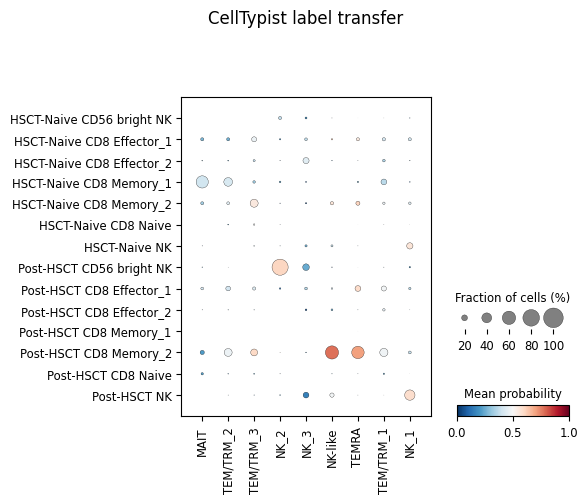

In [15]:
col=1;row=1;wid=5
fig, ax = plt.subplots(row, col, figsize=(col*wid,row*wid), gridspec_kw={'wspace':0.01})
celltypist.dotplot(predictions, use_as_reference = 'T-subtype', use_as_prediction = 'predicted_labels', ax=ax, show=False)
#plt.savefig(f'AML_DLI_AML_Livius_final.pdf',bbox_inches='tight');


## AML_Abbas

In [54]:
model = '/n/data2/dfci/medonc/cwu/meb521/singlecell/TcellAtlas/Abbas_sub_1000_500gene_10it_200it.pkl'

In [22]:
!cp /n/data2/dfci/medonc/cwu/meb521/singlecell/TcellAtlas/Abbas_sub_1000_500gene_10it_200it.pkl /home/meb521/AML_DLI/

In [55]:
t_start = time.time()
predictions = celltypist.annotate(adata, model = model)
t_end = time.time()
print(f"Time elapsed: {t_end - t_start} seconds")

🔬 Input data has 16952 cells and 15254 genes
🔗 Matching reference genes in the model
🧬 2724 features used for prediction
⚖️ Scaling input data
🖋️ Predicting labels
✅ Prediction done!


Time elapsed: 2.2326669692993164 seconds


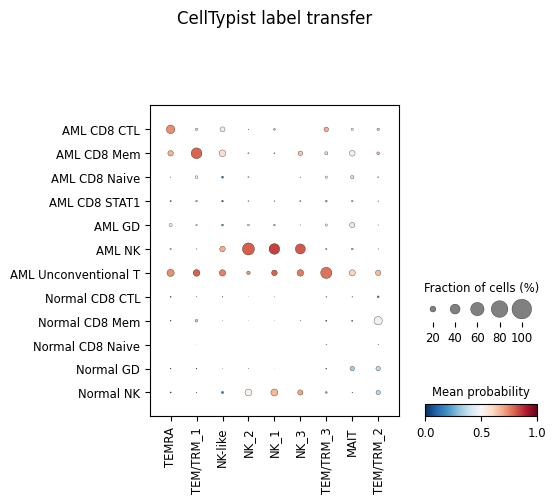

In [56]:
col=1;row=1;wid=5
fig, ax = plt.subplots(row, col, figsize=(col*wid,row*wid), gridspec_kw={'wspace':0.01})
celltypist.dotplot(predictions, use_as_reference = 'T-subtype', use_as_prediction = 'predicted_labels', ax=ax, show=False)
plt.savefig(f'AML_DLI_Abbas_final.pdf',bbox_inches='tight');


## Camilla CLL

In [57]:
model = '/n/data2/dfci/medonc/cwu/meb521/singlecell/TcellAtlas/CLL_sub_500_500gene_10it_100it.pkl'

In [24]:
!cp /n/data2/dfci/medonc/cwu/meb521/singlecell/TcellAtlas/CLL_sub_500_500gene_10it_100it.pkl /home/meb521/AML_DLI/

In [58]:
t_start = time.time()
predictions = celltypist.annotate(adata, model = model)
t_end = time.time()
print(f"Time elapsed: {t_end - t_start} seconds")

🔬 Input data has 16952 cells and 15254 genes
🔗 Matching reference genes in the model
🧬 3248 features used for prediction
⚖️ Scaling input data
🖋️ Predicting labels
✅ Prediction done!


Time elapsed: 3.0559558868408203 seconds


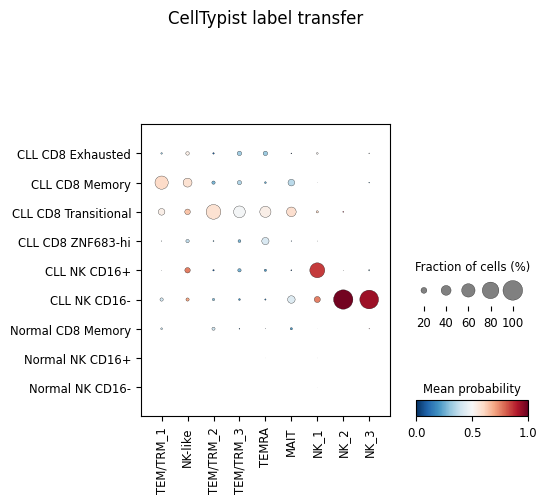

In [59]:
col=1;row=1;wid=5
fig, ax = plt.subplots(row, col, figsize=(col*wid,row*wid), gridspec_kw={'wspace':0.01})
celltypist.dotplot(predictions, use_as_reference = 'T-subtype', use_as_prediction = 'predicted_labels', ax=ax, show=False)
plt.savefig(f'AML_DLI_Camilla_final.pdf',bbox_inches='tight');

## Zheng T Atlas

In [19]:
model = '/n/data2/dfci/medonc/cwu/meb521/singlecell/TcellAtlas/CD8_sub_1500_500gene_10it_200it.pkl'

In [26]:
!cp /n/data2/dfci/medonc/cwu/meb521/singlecell/TcellAtlas/CD8_sub_1500_500gene_10it_200it.pkl /home/meb521/AML_DLI/

In [20]:
t_start = time.time()
#predictions = celltypist.annotate(adata, model = '/n/data2/dfci/medonc/cwu/meb521/singlecell/TcellAtlas/AML_Livius_sub_500_500gene_10it_100it.pkl')
predictions = celltypist.annotate(adata, model = model)
t_end = time.time()
print(f"Time elapsed: {t_end - t_start} seconds")

🔬 Input data has 16952 cells and 15254 genes
🔗 Matching reference genes in the model
🧬 1647 features used for prediction
⚖️ Scaling input data
🖋️ Predicting labels
✅ Prediction done!


Time elapsed: 1.5319454669952393 seconds


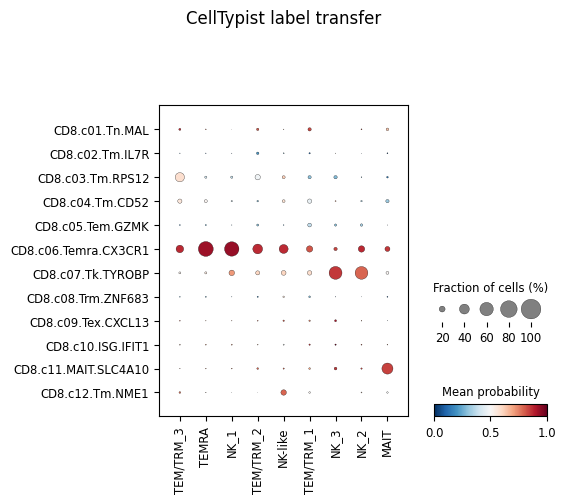

In [21]:
col=1;row=1;wid=5
fig, ax = plt.subplots(row, col, figsize=(col*wid,row*wid), gridspec_kw={'wspace':0.01})
celltypist.dotplot(predictions, use_as_reference = 'T-subtype', use_as_prediction = 'predicted_labels', ax=ax, show=False)
plt.savefig(f'AML_DLI_Zheng_final.pdf',bbox_inches='tight');
